# **1.Import Libraries.**


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2.Read and View Data**

In [41]:
df=pd.read_csv("/content/Student_Performance_missing.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,NaN,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0


In [42]:
print("DataSet Shape: " , df.shape)

DataSet Shape:  (10000, 6)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9805 non-null   float64
 1   Previous Scores                   9731 non-null   float64
 2   Extracurricular Activities        9740 non-null   object 
 3   Sleep Hours                       9844 non-null   float64
 4   Sample Question Papers Practiced  9696 non-null   float64
 5   Performance Index                 9952 non-null   float64
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [44]:
df["Performance Index"].value_counts()

,count
Performance Index,
67.0,186
45.0,185
56.0,181
40.0,180
49.0,180
...,...
14.0,7
99.0,6
11.0,5


# **3.Data Preprocessing**

In [45]:
#Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 99


In [46]:
 #remove duplicated rows
df = df.drop_duplicates()
print("Duplicates removed. New shape:", df.shape)

Duplicates removed. New shape: (9901, 6)


In [47]:
#Generate a statistical summary of a DataFrame
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9706.000000,9632.000000,9745.000000,9598.000000,9853.000000
mean,4.994436,69.442276,6.534633,4.586060,55.209784
std,2.590270,17.312299,1.697354,2.870052,19.197367
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [48]:
#Quick summary for the dataset to chaeck missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9901 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9706 non-null   float64
 1   Previous Scores                   9632 non-null   float64
 2   Extracurricular Activities        9641 non-null   object 
 3   Sleep Hours                       9745 non-null   float64
 4   Sample Question Papers Practiced  9598 non-null   float64
 5   Performance Index                 9853 non-null   float64
dtypes: float64(5), object(1)
memory usage: 541.5+ KB


In [49]:
# Checking If There Is Any Missing Values and print them
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False) #sort from biggest to smaller

print(f"Total columns with missing values: {len(missing_values)}")
print("\nColumns with missing values:")
print(missing_values)

# Calculate percentage
print("\nPercentage of missing values:")
print((missing_values / len(df)) * 100)

Total columns with missing values: 6

Columns with missing values:
Sample Question Papers Practiced    303
Previous Scores                     269
Extracurricular Activities          260
Hours Studied                       195
Sleep Hours                         156
Performance Index                    48
dtype: int64

Percentage of missing values:
Sample Question Papers Practiced    3.060297
Previous Scores                     2.716897
Extracurricular Activities          2.625997
Hours Studied                       1.969498
Sleep Hours                         1.575598
Performance Index                   0.484800
dtype: float64


In [50]:
# Check which columns are numerical vs categorical
print("Data types of columns with missing values:\n")
for col in missing_values.index:
    print(f"{col}: {df[col].dtype}")

Data types of columns with missing values:

Sample Question Papers Practiced: float64
Previous Scores: float64
Extracurricular Activities: object
Hours Studied: float64
Sleep Hours: float64
Performance Index: float64


In [51]:
#Data Imputation
from sklearn.impute import SimpleImputer

# Numerical columns
num_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
            'Sample Question Papers Practiced', 'Performance Index']

num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical column
cat_cols = ['Extracurricular Activities']

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [52]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [53]:
#Binary Enccoding
x = df.drop("Performance Index", axis=1) #Features
y = df["Performance Index"] #Target

# Use Binary Encoding o nCategorical column.
x["Extracurricular Activities"] = x["Extracurricular Activities"].map({"Yes": 1, "No": 0})

print(x)


      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               7.0        99.000000                           1          9.0   
1               4.0        82.000000                           0          4.0   
2               8.0        51.000000                           0          7.0   
3               5.0        52.000000                           1          5.0   
4               7.0        69.442276                           0          8.0   
...             ...              ...                         ...          ...   
9995            1.0        69.442276                           1          4.0   
9996            7.0        64.000000                           1          8.0   
9997            6.0        83.000000                           1          8.0   
9998            9.0        97.000000                           1          7.0   
9999            7.0        74.000000                           0          8.0   

      Sample Question Paper

In [54]:
df_encoded = pd.concat([x, y], axis=1)
df_encoded.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.000000,99.000000,1,9.0,1.0,91.0
1,4.000000,82.000000,0,4.0,2.0,65.0
2,8.000000,51.000000,0,7.0,2.0,45.0
3,5.000000,52.000000,1,5.0,2.0,36.0
4,7.000000,69.442276,0,8.0,5.0,66.0
5,3.000000,78.000000,0,9.0,6.0,61.0
6,7.000000,73.000000,1,5.0,6.0,63.0
7,4.994436,45.000000,1,4.0,6.0,42.0
8,5.000000,77.000000,0,8.0,2.0,61.0
9,4.000000,89.000000,0,4.0,0.0,69.0


# **4.Train / Test Split.**

In [55]:
# import train_test_split function form scikitlearn library.
from sklearn.model_selection import train_test_split

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

print("Training set shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing set shape:", X_test.shape)
print("Testing target shape:", y_test.shape)


Training set shape: (7920, 5)
Training target shape: (7920,)
Testing set shape: (1981, 5)
Testing target shape: (1981,)


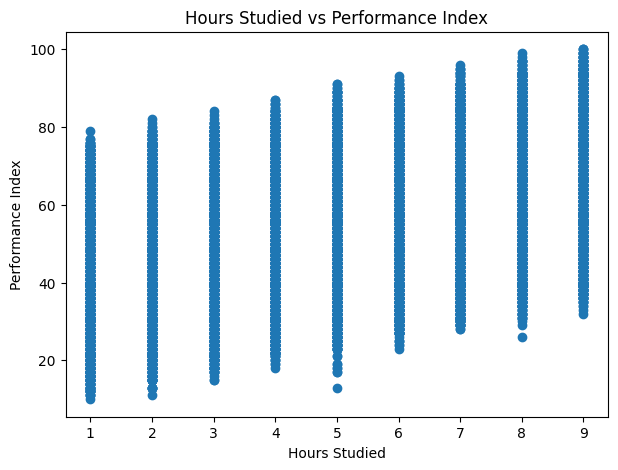

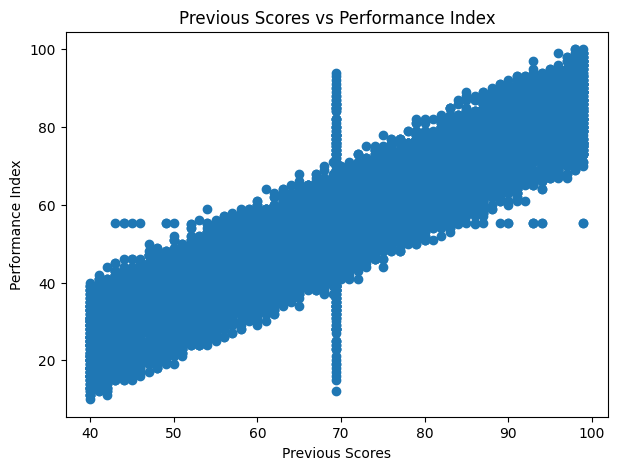

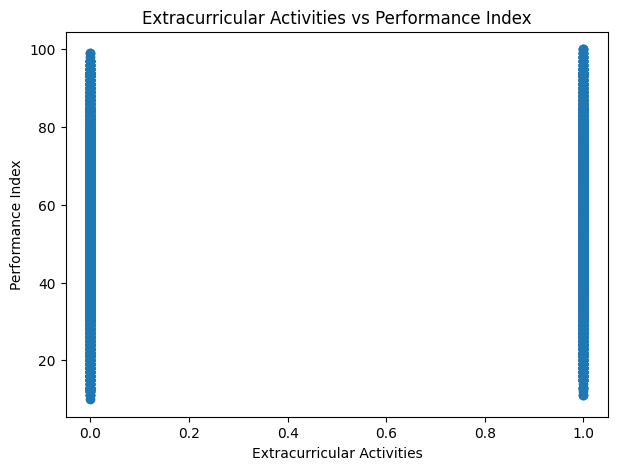

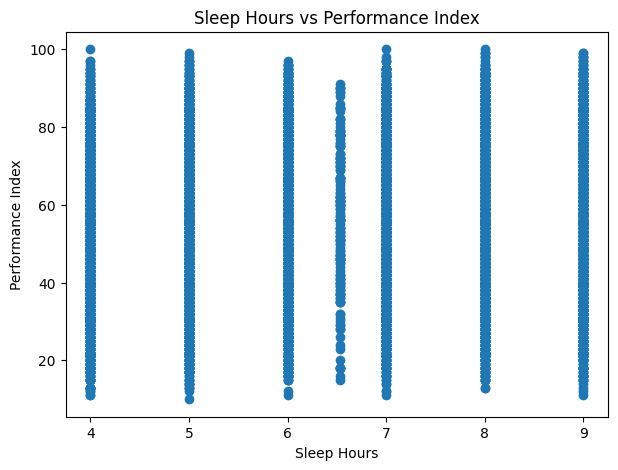

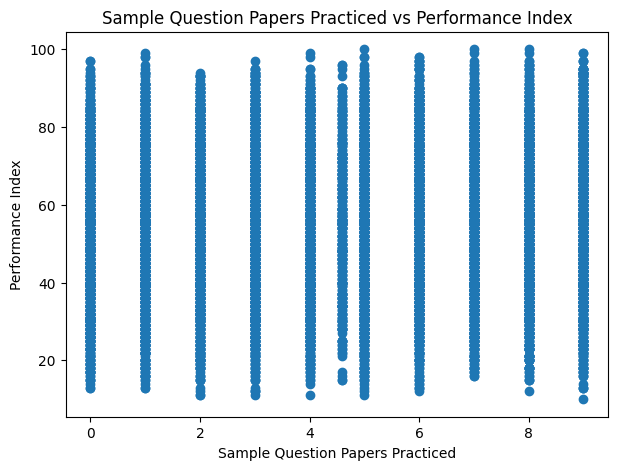

In [56]:
for col in x.columns:
    plt.figure(figsize=(7,5))
    plt.scatter(x[col], y)
    plt.xlabel(col)
    plt.ylabel("Performance Index")
    plt.title(f"{col} vs Performance Index")
    plt.show()

# **5.Scailing**

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


# **6. Intializing the Model**

In [58]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train model on scaled features
model.fit(x_train_scaled, y_train)

LinearRegression()

## y^​=β0​+β1​x1​+β2​x2​+β3​x3​+⋯+βn​x
where β₀ is the intercept and βᵢ are the coefficients of the input features.

In [59]:
# Print coefficients and intercept of the equation .
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 55.34898015986516
Coefficients: [ 7.23967472 17.29820332  0.29457378  0.8406979   0.57480806]


# **7. Evaluation**

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(x_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 2.314148542236321
RMSE: 4.246444538684146
R²: 0.9512021968445247


# **8.Visualization**

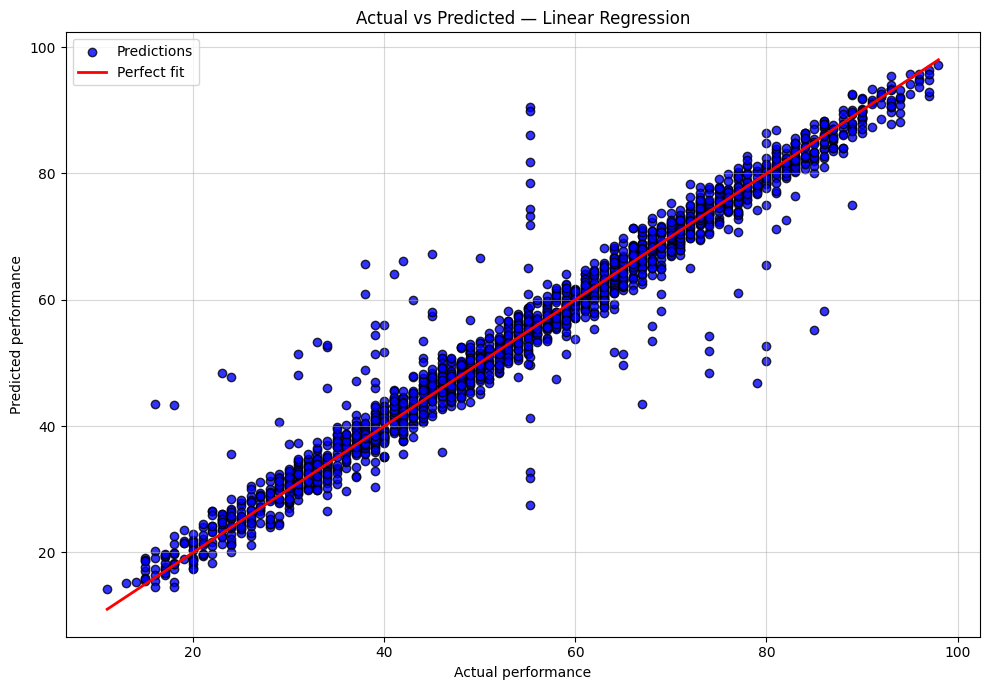

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred,color='blue', alpha=0.8, edgecolor='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', linewidth=2 , label='Perfect fit')

#Plot Details
plt.title("Actual vs Predicted — Linear Regression")
plt.xlabel("Actual performance")
plt.ylabel("Predicted performance")
plt.legend(fontsize=10)
plt.tight_layout()
plt.grid(alpha=0.5)
plt.show()


# **9.Compare between actual and predicated**

In [62]:
prediction_index_table = pd.DataFrame({
    "Original Index": X_test.index,
    "Actual Performance Index": y_test.values,
    "Predicted Performance Index": y_pred
})

prediction_index_table.head(20)


,Original Index,Actual Performance Index,Predicted Performance Index
0,9956,62.0,63.941071
1,5705,62.0,60.423306
2,4784,79.0,76.771898
3,9305,98.0,97.181030
4,621,75.0,76.864674
5,3437,73.0,75.215615
6,9439,75.0,72.907553
7,5989,33.0,32.357017
8,8253,70.0,66.963825
9,9937,54.0,52.681633


# **Trying diff values**

In [64]:
# === SIMPLE UI FOR MANUAL INPUT ===

print("Enter values for a new student:")

hours = float(input("Hours Studied: "))
previous = float(input("Previous Scores: "))
extra = input("Extracurricular Activities (Yes/No): ")
sleep = float(input("Sleep Hours: "))
papers = float(input("Sample Question Papers Practiced: "))

# Convert Yes/No to 1/0 exactly like the training step
extra = 1 if extra.lower() == "yes" else 0

# Create a dataframe for the new row
new_row = pd.DataFrame({
    "Hours Studied": [hours],
    "Previous Scores": [previous],
    "Extracurricular Activities": [extra],
    "Sleep Hours": [sleep],
    "Sample Question Papers Practiced": [papers]
})

# Apply the same scaling
new_row_scaled = scaler.transform(new_row)

# Predict
new_prediction = model.predict(new_row_scaled)

print("\nPredicted Performance Index for this student:", new_prediction[0])


Enter values for a new student:
Hours Studied: 8
Previous Scores: 90
Extracurricular Activities (Yes/No): yes
Sleep Hours: 9
Sample Question Papers Practiced: 8

Predicted Performance Index for this student: 86.83217908801078
